### M3 Homework: GPU-based Classification and Regression from Deep Learning Book

#### Student name: Jacob Mendez
#### Course: Deep Learning
#### Instructor: Dr. Linder
#### Semester: Spring 2025


In [4]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

2025-02-25 18:46:42.434948: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-25 18:46:42.650893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740527202.734154  699337 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740527202.757250  699337 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-25 18:46:42.958595: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


I0000 00:00:1740527206.618166  699337 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9558 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:01:00.0, compute capability: 8.9


In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


# Binary Classification


In [6]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [8]:
train_data[8][0:15],


([1, 43, 188, 46, 5, 566, 264, 51, 6, 530, 664, 14, 9, 1713, 81],)

In [9]:
train_labels[8]

np.int64(1)

In [10]:
train_labels[3]

np.int64(1)

In [11]:
#print out some examples
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def get_review_words(review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in review])
# word_index.get('good')
# word_index.get('ultimate')
train_index_tester = 8
print(train_data[train_index_tester][0:15])
print("Label:", train_labels[train_index_tester] ,"Text:", get_review_words(train_data[train_index_tester]))

[1, 43, 188, 46, 5, 566, 264, 51, 6, 530, 664, 14, 9, 1713, 81]
Label: 1 Text: ? just got out and cannot believe what a brilliant documentary this is rarely do you walk out of a movie theater in such awe and ? lately movies have become so over hyped that the thrill of discovering something truly special and unique rarely happens ? ? did this to me when it first came out and this movie is doing to me now i didn't know a thing about this before going into it and what a surprise if you hear the concept you might get the feeling that this is one of those ? movies about an amazing triumph covered with over the top music and trying to have us fully convinced of what a great story it is telling but then not letting us in ? this is not that movie the people tell the story this does such a good job of capturing every moment of their involvement while we enter their world and feel every second with them there is so much beyond the climb that makes everything they go through so much more tense to

In [12]:
max([max(sequence) for sequence in train_data])


9999

In [13]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [14]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [15]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [16]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [17]:
#define model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [18]:
#compile model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])



In [19]:
#set aside validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [20]:
#train and save history
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/25


I0000 00:00:1740527236.592804  699538 service.cc:148] XLA service 0x7fc0fc019830 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740527236.593362  699538 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2025-02-25 18:47:16.649126: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740527236.767241  699538 cuda_dnn.cc:529] Loaded cuDNN version 90300


22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6683 - loss: 0.6302

I0000 00:00:1740527237.999516  699538 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.6966 - loss: 0.6063 - val_accuracy: 0.8499 - val_loss: 0.4193
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8937 - loss: 0.3545 - val_accuracy: 0.8844 - val_loss: 0.3230
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9199 - loss: 0.2596 - val_accuracy: 0.8779 - val_loss: 0.3081
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9309 - loss: 0.2132 - val_accuracy: 0.8865 - val_loss: 0.2842
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9474 - loss: 0.1689 - val_accuracy: 0.8862 - val_loss: 0.2791
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9561 - loss: 0.1459 - val_accuracy: 0.8845 - val_loss: 0.2881
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9609 - loss: 0.1269 - val_accuracy: 0.8824 - val_loss: 0.3102
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9715 - loss: 0.1052 - val_accuracy: 0.8838 - val_loss: 0.3

In [21]:
history_dict = history.history
history_dict.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

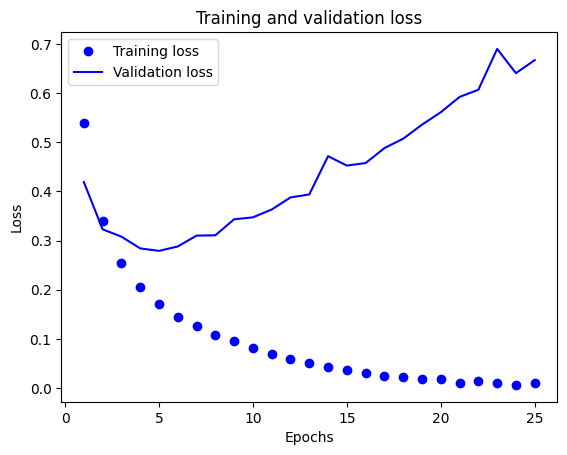

In [22]:
#plotting loss and validation
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


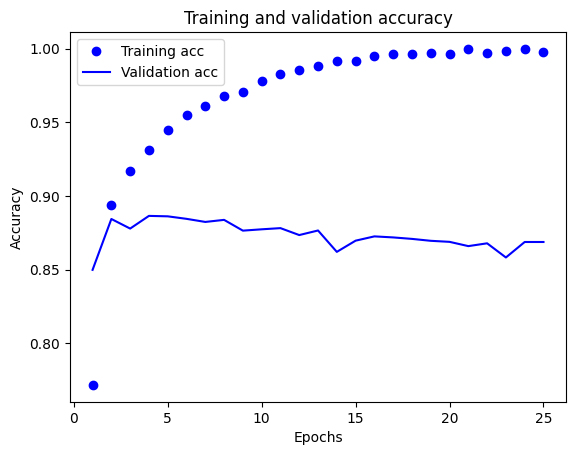

In [23]:
#plotting training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [24]:
#As one big step
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7179 - loss: 0.5831
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8990 - loss: 0.3029
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9238 - loss: 0.2203
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9350 - loss: 0.1833
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8831 - loss: 0.2919


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

In [26]:
### Try some novel data of our own design
def predict_simple_string_of_words(line):
    ret = []
    for w in line.split():
        if w in word_index:
            index = word_index[w]
            if index <= 10000:
                ret += [index]
            else:
                ret += [0]# the unseen character
    ret = vectorize_sequences([list(ret)])
    return(ret)

# predict_simple_string_of_words("this is a test askh")
print(model.predict(predict_simple_string_of_words("this movie was fantastic great wow amazing changed my life")))
print(model.predict(predict_simple_string_of_words("i walked out of the theater and the cgi was derivative")))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
[[0.6572678]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.3094335]]


# Multi-class Classification

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [28]:
len(train_data)


8982

In [29]:
len(test_data)


2246

In [31]:
train_data[10]


[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [32]:
train_labels[0:100]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16,  3,  3,  4,  4, 19,  8, 16,
        3,  3, 21, 11,  4,  4,  3,  3,  1,  3,  1,  3, 16,  1,  4, 13, 20,
        1,  4,  4, 11,  3,  3,  3, 11, 16,  4,  4, 20, 18, 25, 19,  3,  4,
        3,  4,  3,  4,  3,  3,  4,  4,  3,  4,  4,  3, 19, 35,  8,  4,  4,
        3, 16, 25,  3, 11,  3,  9, 16, 38, 10,  4,  4,  9,  3,  3, 28, 20,
        3,  3,  3,  3,  3,  4,  4,  3,  4,  2,  3,  1,  3, 19,  4])

In [33]:
#topic_indexes

In [34]:
#make reverse topic model so we can understand the classes
#https://github.com/keras-team/keras/issues/12072
topic_mapping = {'copper': 6, 'livestock': 28, 'gold': 25, 'money-fx': 19, 'ipi': 30, 'trade': 11, 'cocoa': 0, 'iron-steel': 31, 'reserves': 12, 'tin': 26, 'zinc': 37, 'jobs': 34, 'ship': 13, 'cotton': 14, 'alum': 23, 'strategic-metal': 27, 'lead': 45, 'housing': 7, 'meal-feed': 22, 'gnp': 21, 'sugar': 10, 'rubber': 32, 'dlr': 40, 'veg-oil': 2, 'interest': 20, 'crude': 16, 'coffee': 9, 'wheat': 5, 'carcass': 15, 'lei': 35, 'gas': 41, 'nat-gas': 17, 'oilseed': 24, 'orange': 38, 'heat': 33, 'wpi': 43, 'silver': 42, 'cpi': 18, 'earn': 3, 'bop': 36, 'money-supply': 8, 'hog': 44, 'acq': 4, 'pet-chem': 39, 'grain': 1, 'retail': 29}
topic_mapping_inv = {v: k for k, v in topic_mapping.items()}
topic_mapping_inv

{6: 'copper',
 28: 'livestock',
 25: 'gold',
 19: 'money-fx',
 30: 'ipi',
 11: 'trade',
 0: 'cocoa',
 31: 'iron-steel',
 12: 'reserves',
 26: 'tin',
 37: 'zinc',
 34: 'jobs',
 13: 'ship',
 14: 'cotton',
 23: 'alum',
 27: 'strategic-metal',
 45: 'lead',
 7: 'housing',
 22: 'meal-feed',
 21: 'gnp',
 10: 'sugar',
 32: 'rubber',
 40: 'dlr',
 2: 'veg-oil',
 20: 'interest',
 16: 'crude',
 9: 'coffee',
 5: 'wheat',
 15: 'carcass',
 35: 'lei',
 41: 'gas',
 17: 'nat-gas',
 24: 'oilseed',
 38: 'orange',
 33: 'heat',
 43: 'wpi',
 42: 'silver',
 18: 'cpi',
 3: 'earn',
 36: 'bop',
 8: 'money-supply',
 44: 'hog',
 4: 'acq',
 39: 'pet-chem',
 1: 'grain',
 29: 'retail'}

In [35]:
#print out some examples
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def get_article_words(article):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in article])

for index in range(0,100):
    if train_labels[index] != topic_mapping["crude"]:
        continue 
    decoded_newswire = get_article_words(train_data[index])
    print(decoded_newswire+"\n")

? lt aramco corp has accepted japanese ? to lift a higher proportion of arab heavy crude oil under term contracts in july oil industry sources said japanese companies requested a ratio of 80 pct arab heavy to 20 pct arab light under a term contract agreement with aramco for 100 000 barrels per day the sources said the contractual ratio is 30 pct heavy crude to 70 pct light japanese demand for heavy crude oil has increased substantially since the all japan ? union ceased ? into the northern mideast gulf last month causing problems with liftings of heavy kuwait and ? crudes reuter 3

? standard oil co said a contract has been awarded to lt cbs engineering inc for a drilling and production platform to be installed in ? bank block 826 in the gulf of mexico where standard and mobil corp each own a 40 pct interest standard said its standard oil production co subsidiary will operate the platform which is being designed to produce 15 000 barrels of oil and 50 mln cubic feet of gas daily the pl

In [36]:
#Same multi-hot version of encoding we used before
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [37]:
#do incoding for the input data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [38]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [39]:
#perform one hot encoding for the data labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [40]:
print(y_train[3])
print(np.argmax(y_train[3]))

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4


In [41]:
#set aside validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [42]:
#define model
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])


In [43]:
#compile model
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [44]:
#train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20


2025-02-25 18:49:03.915098: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_227', 304 bytes spill stores, 304 bytes spill loads

2025-02-25 18:49:04.095042: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_199', 292 bytes spill stores, 292 bytes spill loads

2025-02-25 18:49:04.191197: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_227', 452 bytes spill stores, 452 bytes spill loads

2025-02-25 18:49:04.334723: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_227', 204 bytes spill stores, 204 bytes spill loads



14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3157 - loss: 3.3812

2025-02-25 18:49:06.686421: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_199', 340 bytes spill stores, 340 bytes spill loads

2025-02-25 18:49:06.943236: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_227', 200 bytes spill stores, 344 bytes spill loads

2025-02-25 18:49:07.160336: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_227', 368 bytes spill stores, 500 bytes spill loads



16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 313ms/step - accuracy: 0.3438 - loss: 3.2850 - val_accuracy: 0.6190 - val_loss: 1.8352
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6527 - loss: 1.6689 - val_accuracy: 0.6950 - val_loss: 1.3690
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7298 - loss: 1.2180 - val_accuracy: 0.7290 - val_loss: 1.1886
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7763 - loss: 1.0026 - val_accuracy: 0.7660 - val_loss: 1.0745
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8192 - loss: 0.8421 - val_accuracy: 0.7690 - val_loss: 1.0233
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8512 - loss: 0.6941 - val_accuracy: 0.8020 - val_loss: 0.9454
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8865 - loss: 0.5701 - val_accuracy: 0.8040 - val_loss: 0.9012
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9049 - loss: 0.4743 - val_accuracy: 0.8060 - val_loss: 0.8869
E

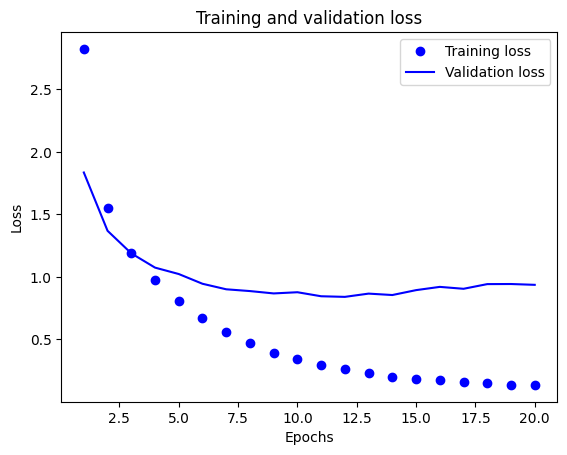

In [45]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


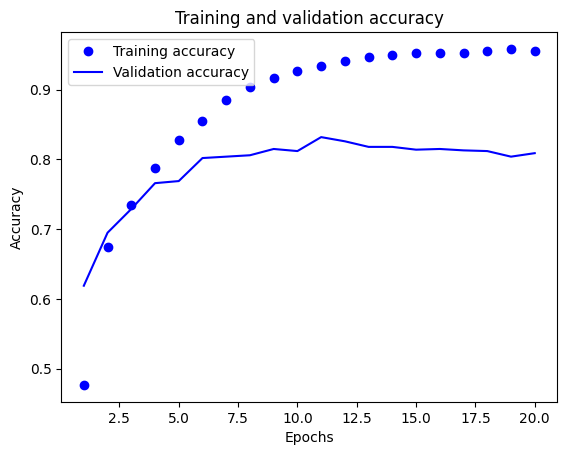

In [46]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [47]:
#model from scratch with earlier stopping
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
13/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3830 - loss: 3.3729

2025-02-25 18:49:22.463277: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_225', 4 bytes spill stores, 4 bytes spill loads

2025-02-25 18:49:22.808062: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_199', 340 bytes spill stores, 340 bytes spill loads

2025-02-25 18:49:23.039408: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_225', 56 bytes spill stores, 56 bytes spill loads

2025-02-25 18:49:23.058328: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_225', 60 bytes spill stores, 60 bytes spill loads

2025-02-25 18:49:23.349674: I external/local_xla/xla/stream_exec

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - accuracy: 0.4239 - loss: 3.1676
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6767 - loss: 1.5590
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7541 - loss: 1.1423
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ -1s 5ms/step - accuracy: 0.8057 - loss: 0.9264     
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8393 - loss: 0.7571
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8668 - loss: 0.6291
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8912 - loss: 0.5209
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9088 - loss: 0.4319
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9243 - loss: 0.3725
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8064 - loss: 0.8900


# Scalar Regression


In [49]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers


from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


In [50]:
#13 features, with 404 in train in 102 in test
train_data.shape


(404, 13)

In [51]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [52]:
test_data.shape


(102, 13)

In [53]:
#house costs in thousands of USD in ~1978 money.
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [54]:
#normalize data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
#note, we use normalizing values from the training data
train_data /= std
test_data -= mean
test_data /= std


In [55]:
#define model with two dense layers and one final layer for the scalar final neuron.
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model


In [56]:
#k fold validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [57]:
all_scores


[2.0502185821533203, 2.3356571197509766, 2.508911609649658, 2.6244571208953857]

In [58]:
np.mean(all_scores)


np.float64(2.379811108112335)

In [59]:
#validations at each fold#### may take a lot of time?
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [60]:
#develop chart data
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]


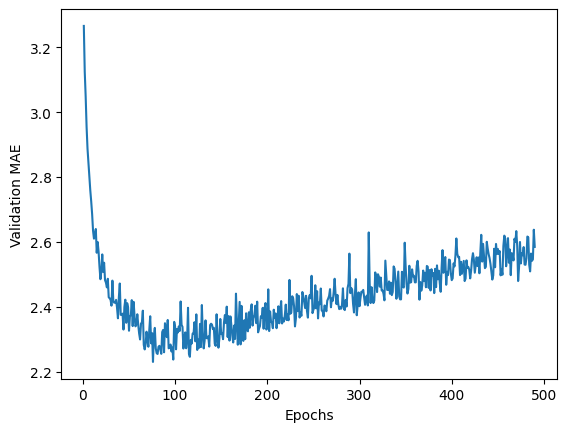

In [61]:
#validations without first 10 points
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()


In [62]:
#final model
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 11.0391 - mae: 2.4215


In [63]:
test_mae_score

2.566725492477417

## Question Set 1 - Baseline Examples: 

### In plain language, briefly describe each of the three above examples in terms of the input, output, and structure of the deep learning network applied.

### Answer: 
### Binary Classification: Our data is imdb movie reviews. The data is reviews and the labels are whether it is a positive review (1) or a negative review (0). To process the reviews, we take each review (max words per review is 10000) and, after splitting into training and testing data, we map each review to a 10,000 dimension semantic space. We also convert the labels into arrays so we can easily match the data to the labels. Our model Has 3 fully connected layers, the first 2 with 16 neurons and the last with 1 neuron. Relu activation means if the input of the neuron is not less than 0, the output is simply the input. The final layer has sigmoid activation which outputs either 0 or 1, which is perfect for binary classification. The output is 0 or 1; either the review is positive (1), or negative (0).
### Multiclass Classification: Our data is reuters news articles. The goal is to classify the article into a type of article. In order to process the data with the neural network, we do one-hot encoding which is just redefining how we look for categories. With one-hot encoding, instead of checking which category an article belongs to, we have x number of categories and give a category a 1 or a 0 if a keyword is in the article or not. Like binary classification, the network has 3 fully connected layers, with the first 2 having 64 neurons and relu activation. The final layer has 46 neurons and softmax activation. Softmax activation is used for multiclass classification. The output is a probability matrix where the probability that an article belongs to a category is computed for each category.
### Scalar Regression: Our data is boston housing data. It is a matrix with numbers representing scores for different categories and our goal is to generate a model to predict prices of housing. Once our data is split between training and testing, the data is further split into 4(k)folds. The goal of this is to produce a more accurate model by using k-1 (in our case 3 folds) as training data and the remaining fold to test the data. Once a fold has been completed, the folds are rotated in so a new remaining fold will be test for the old folds and one new training fold. This is done until all folds are ran through. We have 3 fully connected layers, with the last layer only containing a single neuron since it is a scalar regression model. 

## Question Set 2 - Pick Example:

### Pick one from the three examples above to manipulate. Which one did you pick?

### Answer: Binary Classification

### Question Set 3 - Memorization:

### Use your example to demonstrate overtaining caused by "memorization" by increasing model complexity and too using many epochs. What is your evidence for having done so?

In [64]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#compile model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#set aside validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#train and save history
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val))



Epoch 1/50
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6771 - loss: 0.6053 

2025-02-25 19:00:20.430558: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_291', 80 bytes spill stores, 80 bytes spill loads



30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.6963 - loss: 0.5841 - val_accuracy: 0.8659 - val_loss: 0.3534
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8871 - loss: 0.3130 - val_accuracy: 0.8700 - val_loss: 0.3144
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9074 - loss: 0.2373 - val_accuracy: 0.8735 - val_loss: 0.3097
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9279 - loss: 0.1875 - val_accuracy: 0.8404 - val_loss: 0.4092
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9498 - loss: 0.1424 - val_accuracy: 0.8850 - val_loss: 0.3010
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9577 - loss: 0.1184 - val_accuracy: 0.8368 - val_loss: 0.4651
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9631 - loss: 0.1030 - val_accuracy: 0.8701 - val_loss: 0.3997
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9673 - loss: 0.0880 - val_accuracy: 0.8797 - val_loss: 0.3512


In [65]:
history_dict = history.history
history_dict.keys()
epocs = range(1, len(history_dict["loss"]) + 1)


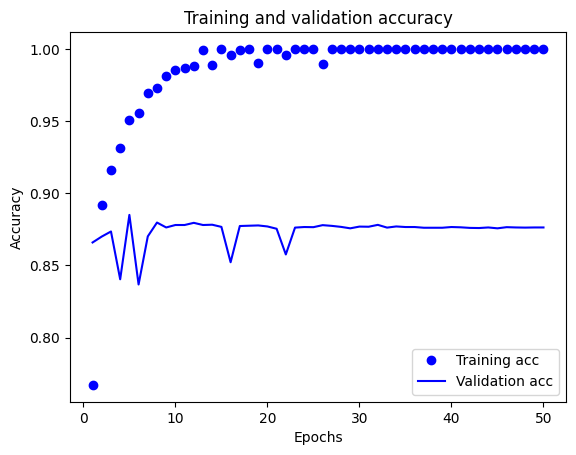

In [66]:
history_dict = history.history

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epocs, acc, "bo", label="Training acc")
plt.plot(epocs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Q3 Answer: The graph here shows the accuracy of training and validation data over epochs. We see that the accuracy of the training data reaches near 100% while validation converges to about 87%. We have overtraining because if the accuracy of training is as high as it is while validation is significantly lower, then the model is "remembering" the training data.

### Question Set 4 - Not Enough Neurons:

### Use your example to demonstrate undertraining by reducing complexity and using too few epochs. What is your evidence for having done so?

In [67]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(2, activation="relu"),
    layers.Dense(2, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#compile model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#set aside validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#train and save history
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6612 - loss: 0.6352 - val_accuracy: 0.8189 - val_loss: 0.5532
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8203 - loss: 0.5199 - val_accuracy: 0.8452 - val_loss: 0.5149
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ -0s -18258us/step - accuracy: 0.8639 - loss: 0.4740 - val_accuracy: 0.8433 - val_loss: 0.4923
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8893 - loss: 0.4478 - val_accuracy: 0.8588 - val_loss: 0.4767
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9149 - loss: 0.4203 - val_accuracy: 0.8564 - val_loss: 0.4689


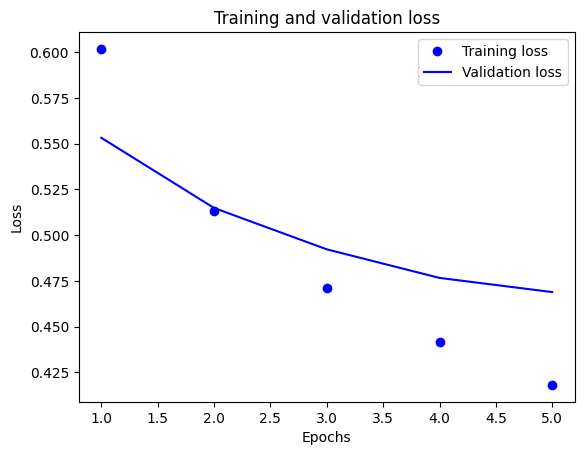

In [69]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

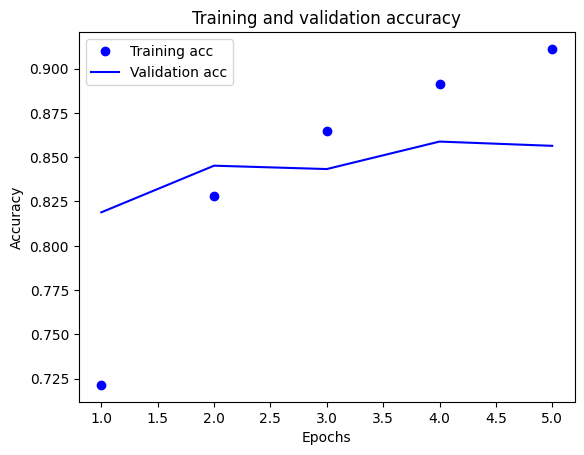

In [70]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Q4 Answer: Here we have an undertrained model. In both accuracy and loss, we see no correlation between training and validation data, meaning the model is not strong enough to apply what it's learned to the validation data. More complexity is needed to understand the relationships.

### Question Set 5 - Learning Rate:

### Use your example to demonstrate different learning rates. Be sure to include one so high that it "overshoots" durring training and one so low that effective training takes more epochs. What is your evidence for having done so?


In [71]:
#Model 1
from tensorflow.keras import optimizers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

optimizer = optimizers.RMSprop(learning_rate=0.1)

model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])

#set aside validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#train and save history
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4875 - loss: 2.3363 - val_accuracy: 0.5502 - val_loss: 0.6784
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5143 - loss: 0.8373 - val_accuracy: 0.4949 - val_loss: 0.6933
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5040 - loss: 1.1056 - val_accuracy: 0.4947 - val_loss: 0.6944
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5084 - loss: 0.6931 - val_accuracy: 0.4947 - val_loss: 0.6937
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4958 - loss: 0.6940 - val_accuracy: 0.5053 - val_loss: 0.6962
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4968 - loss: 0.6945 - val_accuracy: 0.5054 - val_loss: 0.6934
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4993 - loss: 0.7040 - val_accuracy: 0.5078 - val_loss: 0.6972
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5040 - loss: 0.6936 - val_accuracy: 0.5259 - val_los

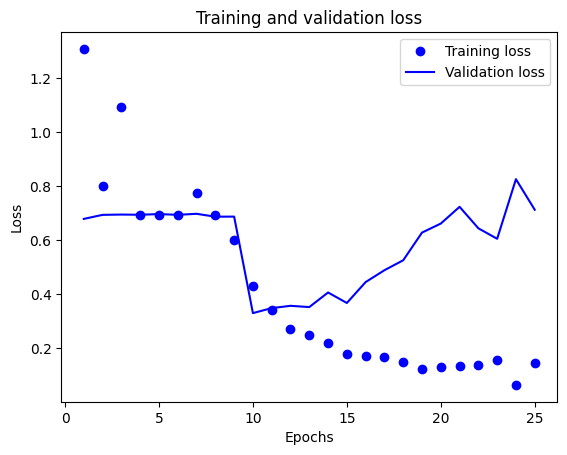

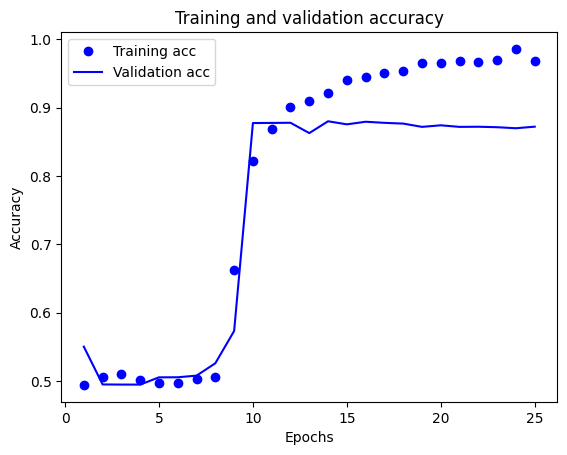

In [72]:
history_dict = history.history
history_dict.keys()
#plotting loss and validation
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plotting training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [73]:
#Model 2
from tensorflow.keras import optimizers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

optimizer = optimizers.RMSprop(learning_rate=0.000001)

model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=["accuracy"])

#set aside validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#train and save history
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5210 - loss: 0.6922 - val_accuracy: 0.5292 - val_loss: 0.6918
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5160 - loss: 0.6919 - val_accuracy: 0.5314 - val_loss: 0.6916
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5261 - loss: 0.6922 - val_accuracy: 0.5328 - val_loss: 0.6915
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5253 - loss: 0.6918 - val_accuracy: 0.5339 - val_loss: 0.6914
Epoch 5/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5173 - loss: 0.6920 - val_accuracy: 0.5354 - val_loss: 0.6912
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5135 - loss: 0.6926 - val_accuracy: 0.5368 - val_loss: 0.6911
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5279 - loss: 0.6911 - val_accuracy: 0.5380 - val_loss: 0.6910
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5277 - loss: 0.6912 - val_accuracy: 0.5397 - val_

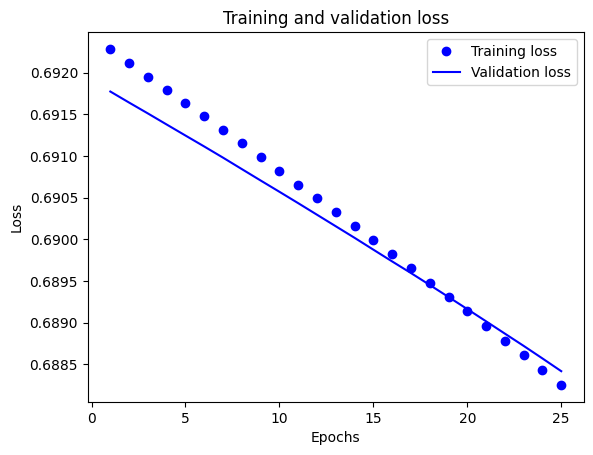

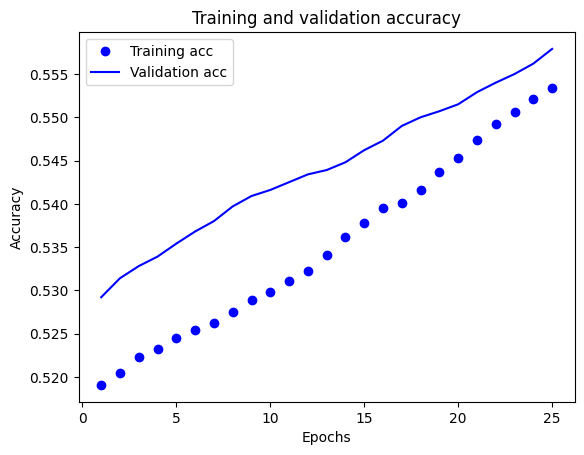

In [74]:
history_dict = history.history
history_dict.keys()
#plotting loss and validation
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plotting training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Q5 Answer: Model 1 has a learning rate too high, and model 2 has a learning rate too low. For model 1, we see that the trends of training accuracy mirror the validation accuracy, implying the model is overtrained. With model 2, the trends are linear,  which implies the accuracy and loss have yet to converge. Because the accuracy and loss do not trend toward a set value, there were not enough epochs to arrive at that set value, so the model is undertrained.

### NOTE: Your work must use a GPU for compute. You also will need to copy and paste the examples inline. If there is code required to answer the Question Set, then you will need to add cells between the Question Set question and Question Set answer.